In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import os

In [15]:
swimming = pd.read_csv(os.path.join("data/Summer_events/summer_male_Swimming.csv"))
swimming.head()

,Age,Height,Weight,Team,Year,City,Event,Medal
0,21,194,78.0,Netherlands,1996,Atlanta,Swimming Men's 100 metres Butterfly,---
1,21,194,78.0,Netherlands,1996,Atlanta,Swimming Men's 200 metres Butterfly,---
2,21,194,78.0,Netherlands,1996,Atlanta,Swimming Men's 4 x 100 metres Medley Relay,---
3,25,194,78.0,Netherlands,2000,Sydney,Swimming Men's 100 metres Butterfly,---
4,25,194,78.0,Netherlands,2000,Sydney,Swimming Men's 200 metres Butterfly,---


In [16]:
swimmingcopied = swimming.copy()

swimming_dummies = pd.get_dummies(swimmingcopied, columns=["Team", "Year", "City", "Event"])
swimming_dummies.head()

,Age,Height,Weight,Medal,Team_Algeria,Team_Andorra,Team_Argentina,Team_Aruba,Team_Australasia,Team_Australia,...,Event_Swimming Men's 200 metres Freestyle,Event_Swimming Men's 200 metres Individual Medley,Event_Swimming Men's 4 x 100 metres Freestyle Relay,Event_Swimming Men's 4 x 100 metres Medley Relay,Event_Swimming Men's 4 x 200 metres Freestyle Relay,"Event_Swimming Men's 4,000 metres Freestyle",Event_Swimming Men's 400 metres Breaststroke,Event_Swimming Men's 400 metres Freestyle,Event_Swimming Men's 400 metres Individual Medley,Event_Swimming Men's 50 metres Freestyle
0,21,194,78.0,---,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,194,78.0,---,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,194,78.0,---,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,25,194,78.0,---,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25,194,78.0,---,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Replace string with integers for Medals column
swimming_dummies = swimming_dummies.replace({"Medal": {"---":0}})
swimming_dummies = swimming_dummies.replace({"Medal": {"Gold":1}})
swimming_dummies = swimming_dummies.replace({"Medal": {"Silver":2}})
swimming_dummies = swimming_dummies.replace({"Medal": {"Bronze":3}})
swimming_dummies

,Age,Height,Weight,Medal,Team_Algeria,Team_Andorra,Team_Argentina,Team_Aruba,Team_Australasia,Team_Australia,...,Event_Swimming Men's 200 metres Freestyle,Event_Swimming Men's 200 metres Individual Medley,Event_Swimming Men's 4 x 100 metres Freestyle Relay,Event_Swimming Men's 4 x 100 metres Medley Relay,Event_Swimming Men's 4 x 200 metres Freestyle Relay,"Event_Swimming Men's 4,000 metres Freestyle",Event_Swimming Men's 400 metres Breaststroke,Event_Swimming Men's 400 metres Freestyle,Event_Swimming Men's 400 metres Individual Medley,Event_Swimming Men's 50 metres Freestyle
0,21,194,78.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,194,78.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,194,78.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,25,194,78.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25,194,78.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,25,193,85.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1368,20,190,82.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1369,15,178,68.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1370,19,178,68.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<!-- dummy df exported, now importing again to make it easier for random forest tree due to x and x copy -->

In [45]:
y = swimming_dummies["Medal"]
X = swimming_dummies.drop("Medal", axis=1)
# feature_names = data.columns
print(X.shape, y.shape)

(1372, 189) (1372,)


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [71]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [72]:
x_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


k: 1, Train/Test Score: 1.000/0.872
k: 3, Train/Test Score: 0.945/0.901
k: 5, Train/Test Score: 0.928/0.910
k: 7, Train/Test Score: 0.922/0.907
k: 9, Train/Test Score: 0.913/0.910
k: 11, Train/Test Score: 0.911/0.910
k: 13, Train/Test Score: 0.912/0.910
k: 15, Train/Test Score: 0.911/0.913
k: 17, Train/Test Score: 0.909/0.910
k: 19, Train/Test Score: 0.907/0.907


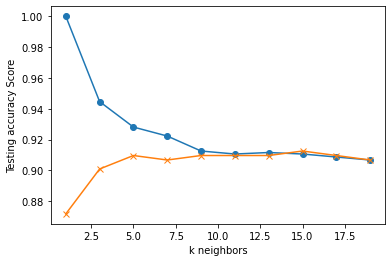

In [73]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [74]:
# Note that k: 11 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.910
